In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

In [3]:
df = pd.read_csv('houses_olx.csv', index_col=0)

In [4]:
df.dropna(subset=["Поверх", "Вид об'єкта"], inplace=True)

In [5]:
def price_to_usd(value):
    if ' грн.' in value:
        number = int(''.join([i for i in value if i.isdigit()]))
        value = str(int(number / 39)) + '$'
    if '\u20AC' in value:
        number = int(''.join([i for i in value if i.isdigit()]))
        value = str(int(number * 1.07)) + '$'
    value = int(float(value.replace(' ', '')[:-1]))
    return value

df.price = df.price.apply(price_to_usd)

In [6]:
df.rename(columns={'feature0': 'Тип оголошення'}, inplace=True)

In [10]:
for value in ('Готовий співпрацювати з ріелторами', 'Без комісії', 'Можливість обміну'):
    x1 = df.loc[df.feature1 == value]
    x2 = df.loc[df.feature2 == value]
    x3 = df.loc[df.feature3 == value]
    x4 = df.loc[df.feature4 == value]
    df[value] = (df.feature1 == value) | (df.feature2 == value) | (df.feature3 == value) | (df.feature4 == value)
df.drop(columns=['feature1', 'feature2', 'feature3', 'feature4'], inplace=True)

In [12]:
df['Поверх'] = df['Поверх'].apply(lambda x: int(max(1, math.floor(x))))

def remake_poverhovist(value):
    try:
        value = int(value)
        if not 1 <= value <= 47:
            value = 99
    except ValueError:
        value = 99
    return value

df['Поверховість'] = df['Поверховість'].apply(remake_poverhovist)

df = df.loc[df['Поверховість'] != 99]

df['Відносна поверховість'] = round(df['Поверх'] / df['Поверховість'], 2)

In [13]:
df['Загальна площа'] = df['Загальна площа'].str.removesuffix(' м²').str.replace(' ', '').astype(float)

df['Площа кухні'] = df['Площа кухні'].str.removesuffix(' м²').str.replace(' ', '').astype(float)

# df['Кількість кімнат'] = df['Кількість кімнат'].apply(lambda x: ''.join([i for i in x if i.isdigit()])).astype(int)
df['Кількість кімнат'] = df['Кількість кімнат'].apply(lambda x: x[0]).astype(int)

df['Клас житла'] = df['Клас житла'].replace(to_replace={'Економ':1, 'Комфорт':2, 'Бізнес':3, 'Еліт':4})

In [17]:
def mebli(value):
    if value == 'Так':
        value = 1
    elif value == 'Ні':
        value = 0
    return value

df['Меблювання'] = df['Меблювання'].apply(mebli)

In [19]:
df.head()

,link,title,price,city,location,Тип оголошення,Вид об'єкта,Тип будинку,Назва ЖК,Поверх,Поверховість,Загальна площа,Площа кухні,Тип стін,Кількість кімнат,Планування,Cанвузол,Опалення,Ремонт,Меблювання,Побутова техніка,Мультимедіа,Комфорт,Комунікації,Клас житла,Тип угоди,Готовий співпрацювати з ріелторами,Без комісії,Можливість обміну,Відносна поверховість
0,https://olx.ua/d/uk/obyavlenie/prodazh-1-kmnatno-kvartiri-schiretska-IDUQxt2.html,"Продаж 1 кімнатної квартири, Щирецька",62000,Львів,Залізничний,Бізнес,Новобудова,Житловий фонд від 2021 р.,Well Home,2,7,40.00,14.0,Цегляний,1,Роздільна,Суміжний,Індивідуальне газове,Після будівельників,0.0,Без побутової техніки,"Wi-Fi, Швидкісний інтернет","Балкон, лоджія, Паркувальне місце, Гостьовий паркінг, Ліфт, Панорамні вікна","Газ, Центральний водопровід, Електрика, Центральна каналізація, Вивіз відходів, Асфальтована дорога",NaN,NaN,False,False,False,0.29
1,https://olx.ua/d/uk/obyavlenie/3h-kmnatna-kvartira-v-zatishnomu-rayon-trotsko-vulits-IDULJgV.html,3х кімнатна квартира в затишному районі Троїцької вулиці,27000,Суми,Суми,Приватна особа,Вторинний ринок,Сталінка,NaN,2,3,57.00,6.0,Цегляний,3,Студія,Суміжний,Індивідуальне газове,Авторський проект,0.0,NaN,NaN,Кондиціонер,"Газ, Центральний водопровід, Електрика, Асфальтована дорога",2.0,NaN,False,False,False,0.67
2,https://olx.ua/d/uk/obyavlenie/prodam-suchasnu-kvartiru-v-stil-loft-z-avtonomnim-opalennyam-IDUI7gJ.html,"Продам сучасну квартиру в стилі "" Лофт "" з автономним опаленням",55500,Суми,Суми,Бізнес,Новобудова,Житловий фонд 2001-2010-і,NaN,5,5,61.00,17.0,Газоблок,2,Роздільна,Суміжний,Індивідуальне газове,Авторський проект,1.0,"Варильна панель, Духова шафа, Мікрохвильова піч, Холодильник, Посудомийна машина, Пральна машина",Wi-Fi,"Підігрів підлоги, Ванна, Меблі на кухні, Гардероб, Балкон, лоджія, Паркувальне місце","Газ, Центральний водопровід, Електрика, Центральна каналізація, Вивіз відходів, Асфальтована дорога",2.0,NaN,False,False,False,1.00
3,https://olx.ua/d/uk/obyavlenie/prodazh-dvokmnatno-blya-dendroparku-na-telnova-IDTPt6d.html,Продаж двокімнатної біля Дендропарку на Тельнова,30000,Кропивницький,Подільський,Бізнес,Вторинний ринок,Хрущовка,NaN,3,5,44.00,6.0,NaN,2,"Суміжна, прохідна",Суміжний,Централізоване,Житловий стан,1.0,"Холодильник, Мікрохвильова піч",NaN,NaN,NaN,NaN,NaN,True,False,False,0.60
4,https://olx.ua/d/uk/obyavlenie/prodam-2k-kvartiru-ul-novomestenskaya-IDUusSm.html,Продам 2к.квартиру ул.Новоместенская,60000,Суми,Суми,Бізнес,Новобудова,NaN,NaN,7,10,79.42,12.0,Цегляний,2,Роздільна,NaN,Централізоване,Після будівельників,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,0.70


In [20]:
for col in df.columns:
    if len(df[col].unique()) < 20:
        print(col, df[col].unique())
        print('**********************')

Тип оголошення ['Бізнес' 'Приватна особа']
**********************
Вид об'єкта ['Новобудова' 'Вторинний ринок']
**********************
Тип будинку ['Житловий фонд від 2021 р.' 'Сталінка' 'Житловий фонд 2001-2010-і'
 'Хрущовка' nan 'Царський будинок' 'Чешка' 'Житловий фонд 91-2000-і'
 'Совмін' 'Житловий фонд 80-90-і' 'Житловий фонд 2011-2020-і' 'Гостинка'
 'Гуртожиток']
**********************
Тип стін ['Цегляний' 'Газоблок' nan 'Монолітний' 'Панельний' 'Інше' 'Шлакоблочний'
 "Дерев'яний" 'СІП панель']
**********************
Кількість кімнат [1 3 2 4 5]
**********************
Планування ['Роздільна' 'Студія' 'Суміжна, прохідна' nan 'Вільне планування'
 'Двостороння' 'Багаторівнева' 'Пентхаус' 'Смарт-квартира'
 'Малосімейка, гостинка']
**********************
Cанвузол ['Суміжний' nan 'Роздільний' '2 і більше' 'Санвузол відсутній']
**********************
Опалення ['Індивідуальне газове' 'Централізоване' nan 'Власна котельня' 'Інше'
 'Індивідуальне електро' 'Комбіноване' 'Тепловий насос' 'Тве

In [21]:
for col in df.columns:
    print(col, sum(df[col].isna()))

link 0
title 0
price 0
city 0
location 0
Тип оголошення 0
Вид об'єкта 0
Тип будинку 11218
Назва ЖК 19876
Поверх 0
Поверховість 0
Загальна площа 0
Площа кухні 0
Тип стін 7135
Кількість кімнат 0
Планування 9167
Cанвузол 7487
Опалення 6133
Ремонт 7175
Меблювання 10091
Побутова техніка 16993
Мультимедіа 19162
Комфорт 14065
Комунікації 14495
Клас житла 13460
Тип угоди 25322
Готовий співпрацювати з ріелторами 0
Без комісії 0
Можливість обміну 0
Відносна поверховість 0


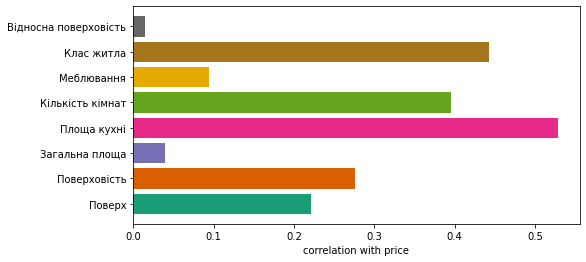

In [150]:
from matplotlib import colormaps as cm

numbers = ['Поверх', 'Поверховість', 'Загальна площа',
           'Площа кухні', 'Кількість кімнат', 'Меблювання', 'Клас житла', 'Відносна поверховість']

def get_colors(colormap, cols):
    num_colors = len(cm[colormap].colors)
    num_cols = len(cols)
    step = max(1, num_colors // num_cols)
    return cm[colormap].colors[::step]

fig, ax = plt.subplots(figsize=(8, 4))

plt.barh(numbers, df_iqr[numbers].corrwith(df_iqr['price']), color=get_colors('Dark2', numbers))
ax.set_xlabel('correlation with price')
plt.show()

In [25]:
def group_func(values):
    return round(sum(values) / len(values), 2)

In [51]:
lower = df['price'].quantile(0.005)
upper = df['price'].quantile(0.995)
df_iqr = df[df['price'].between(lower, upper)]

big_cities = df_iqr.groupby(['city']).filter(lambda group: len(group) > 100)
grouped_big = big_cities.groupby(['city','Кількість кімнат'])['price'].agg(group_func)
grouped_big = grouped_big.unstack().fillna(0)

[]

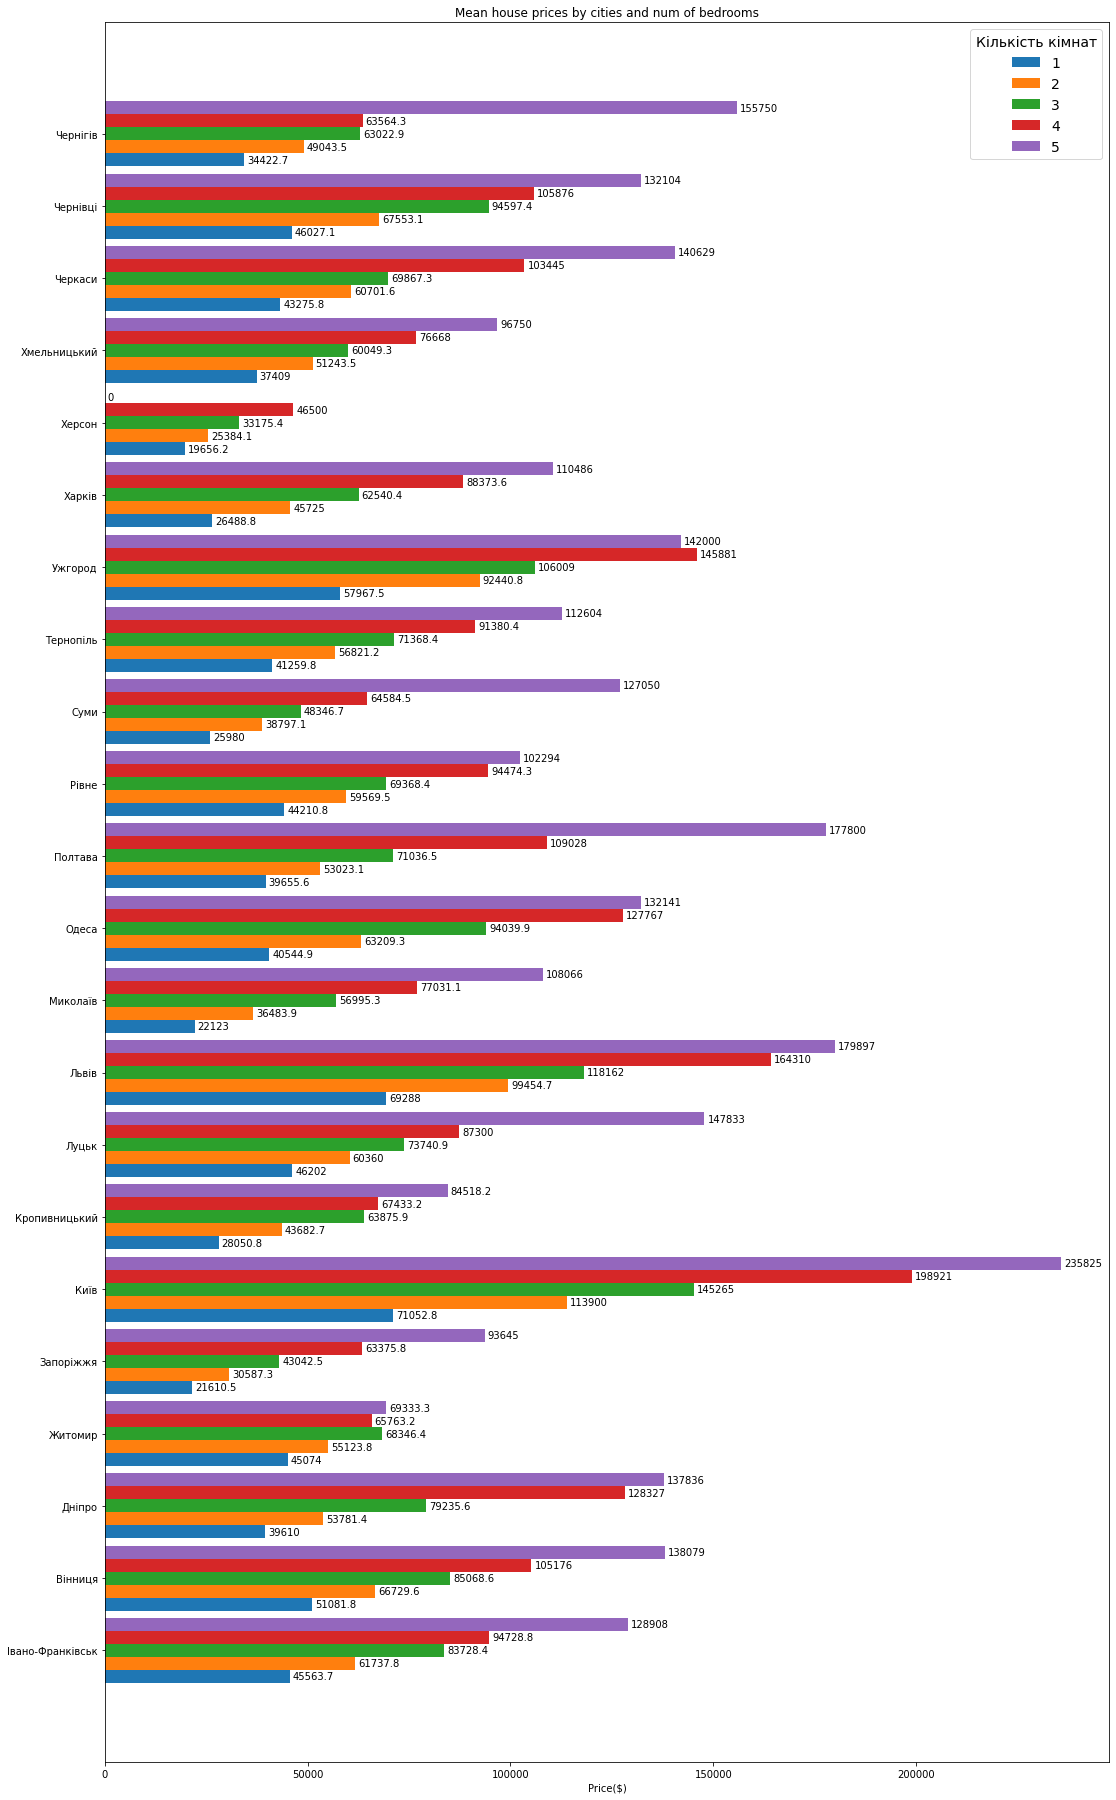

In [52]:
fig, ax = plt.subplots(figsize=(18, 32))

cities = grouped_big.index.values
width = 0.18
y = np.arange(len(cities))
i = 0

for num_bed in grouped_big.columns:
    offset = width * i
    rects = ax.barh(y + offset, grouped_big[num_bed], 
                    width, label=num_bed)
    ax.bar_label(rects, padding=3)
    i += 1

ax.set_xlabel('Price($)')
ax.set_title('Mean house prices by cities and num of bedrooms')
ax.set_yticks(y + 2*width, cities)
ax.legend(title='Кількість кімнат', title_fontsize=14, fontsize=14)
ax.plot()


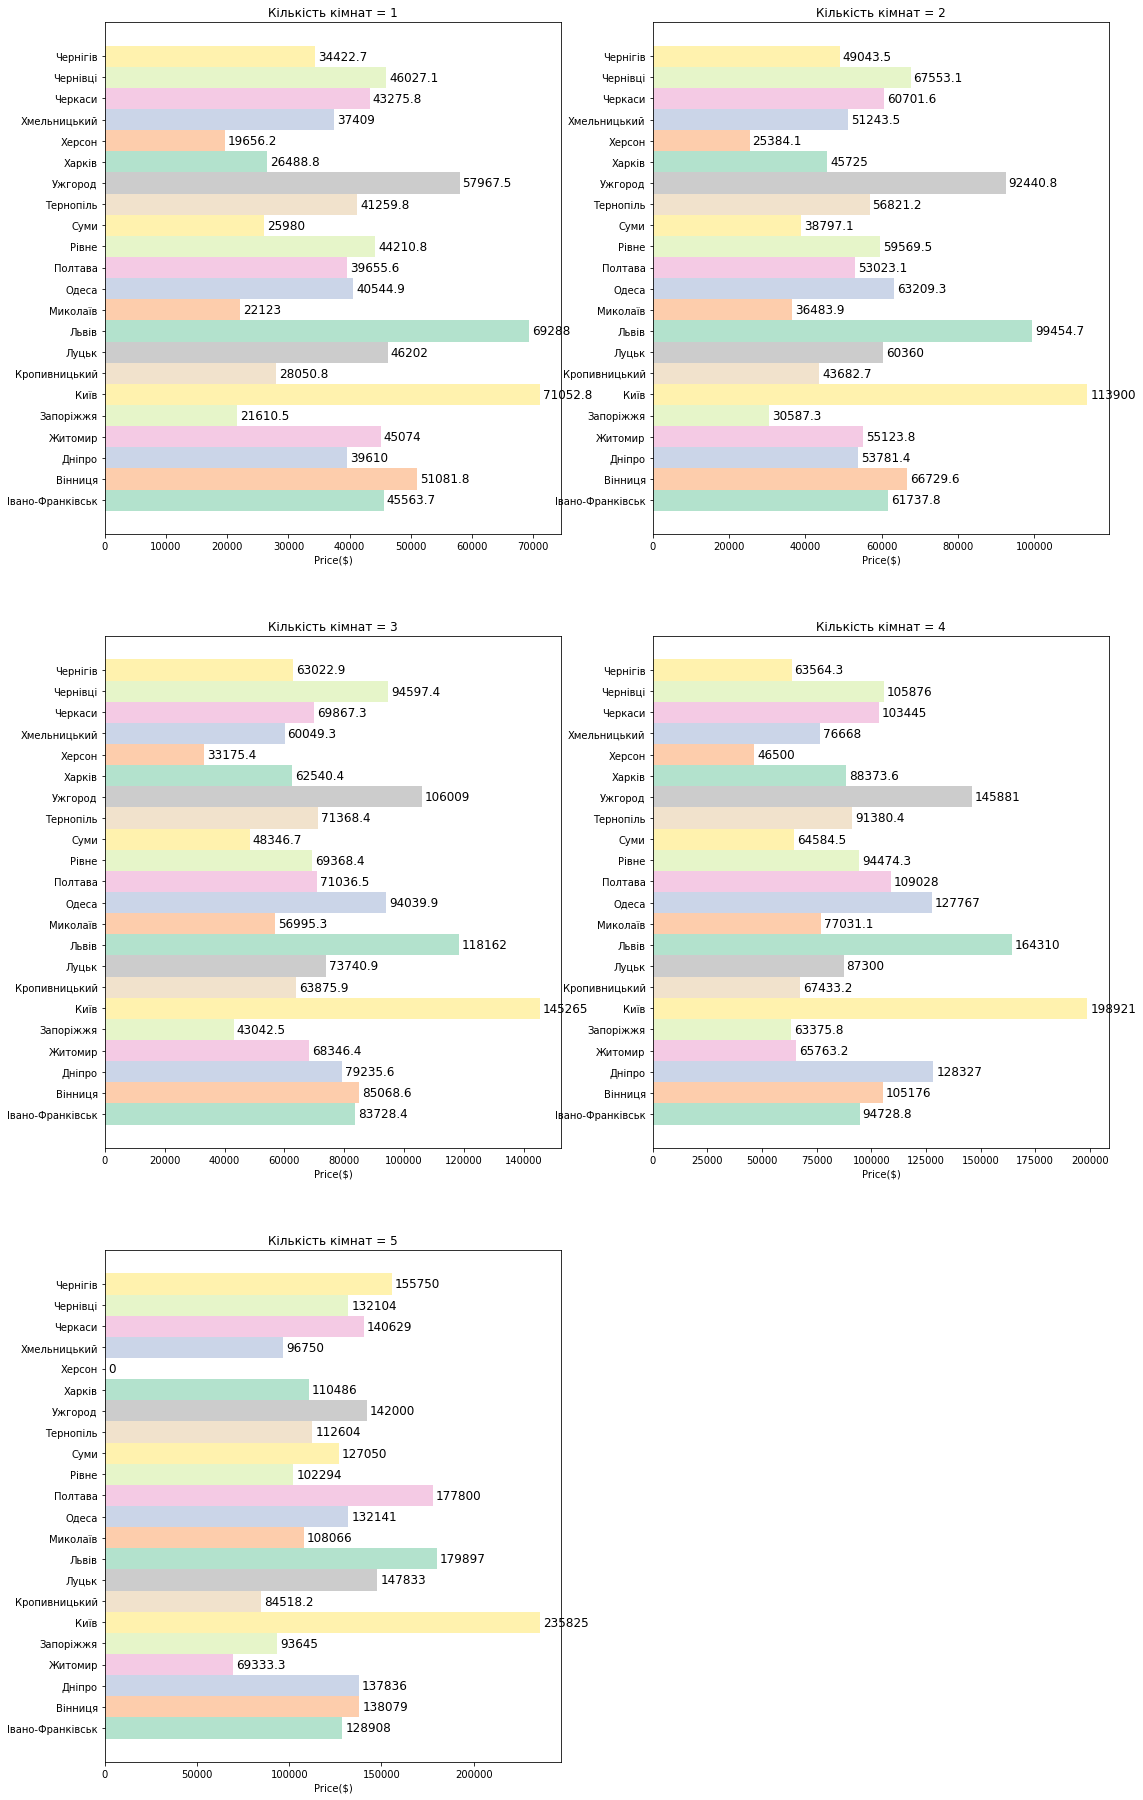

In [53]:
fig = plt.figure(figsize=(18, 32))

mosaic = '''
    12
    34
    5.'''
ax_dict = fig.subplot_mosaic(mosaic)

    
cities = grouped_big.index.values
width = 1
y = np.arange(len(cities))
i = 0

for num_bed, ax_num in zip(grouped_big.columns, ax_dict.keys()):    
    rects = ax_dict[ax_num].barh(y, grouped_big[num_bed], 
                    width, color=get_colors('Pastel2', y))
    ax_dict[ax_num].bar_label(rects, padding=3, fontsize=12)
#     i += 1
    ax_dict[ax_num].set_xlabel('Price($)')
    ax_dict[ax_num].set_title(f'Кількість кімнат = {num_bed}')
    ax_dict[ax_num].set_yticks(y - 1 + width, cities)
    ax_dict[ax_num].plot()


In [54]:
grouped_klas = big_cities.groupby(['city','Клас житла'])['price'].agg(group_func)
grouped_klas = grouped_klas.unstack()

d = {'Економ':1, 'Комфорт':2, 'Бізнес':3, 'Еліт':4}
dd = {v:k for k,v in d.items()}

[]

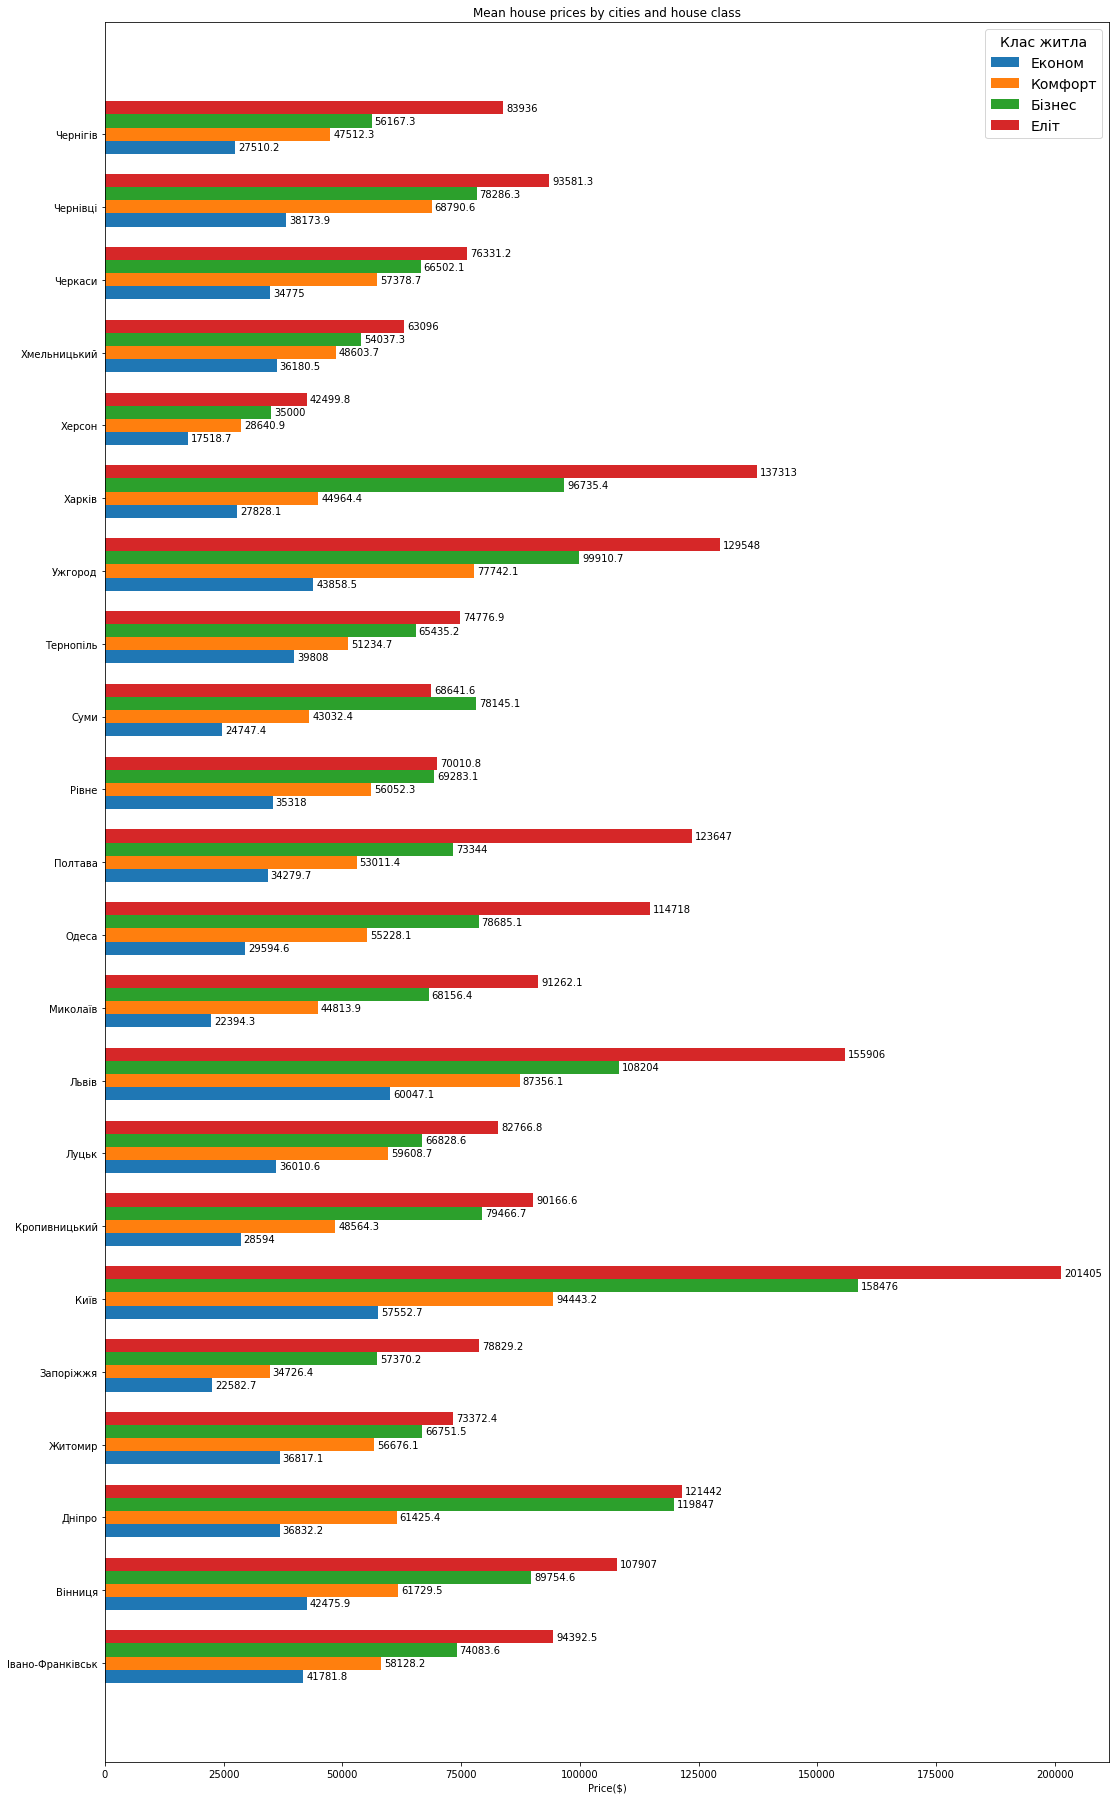

In [55]:
fig, ax = plt.subplots(figsize=(18, 32))

cities = grouped_klas.index.values
width = 0.18
y = np.arange(len(cities))
i = 0

for klas in grouped_klas.columns:
    offset = width * i
    rects = ax.barh(y + offset, grouped_klas[klas], 
                    width, label=dd[klas])
    ax.bar_label(rects, padding=3)
    i += 1

ax.set_xlabel('Price($)')
ax.set_title('Mean house prices by cities and house class')
ax.set_yticks(y + width, cities)
ax.legend(title='Клас житла', title_fontsize=14, fontsize=14)
ax.plot()

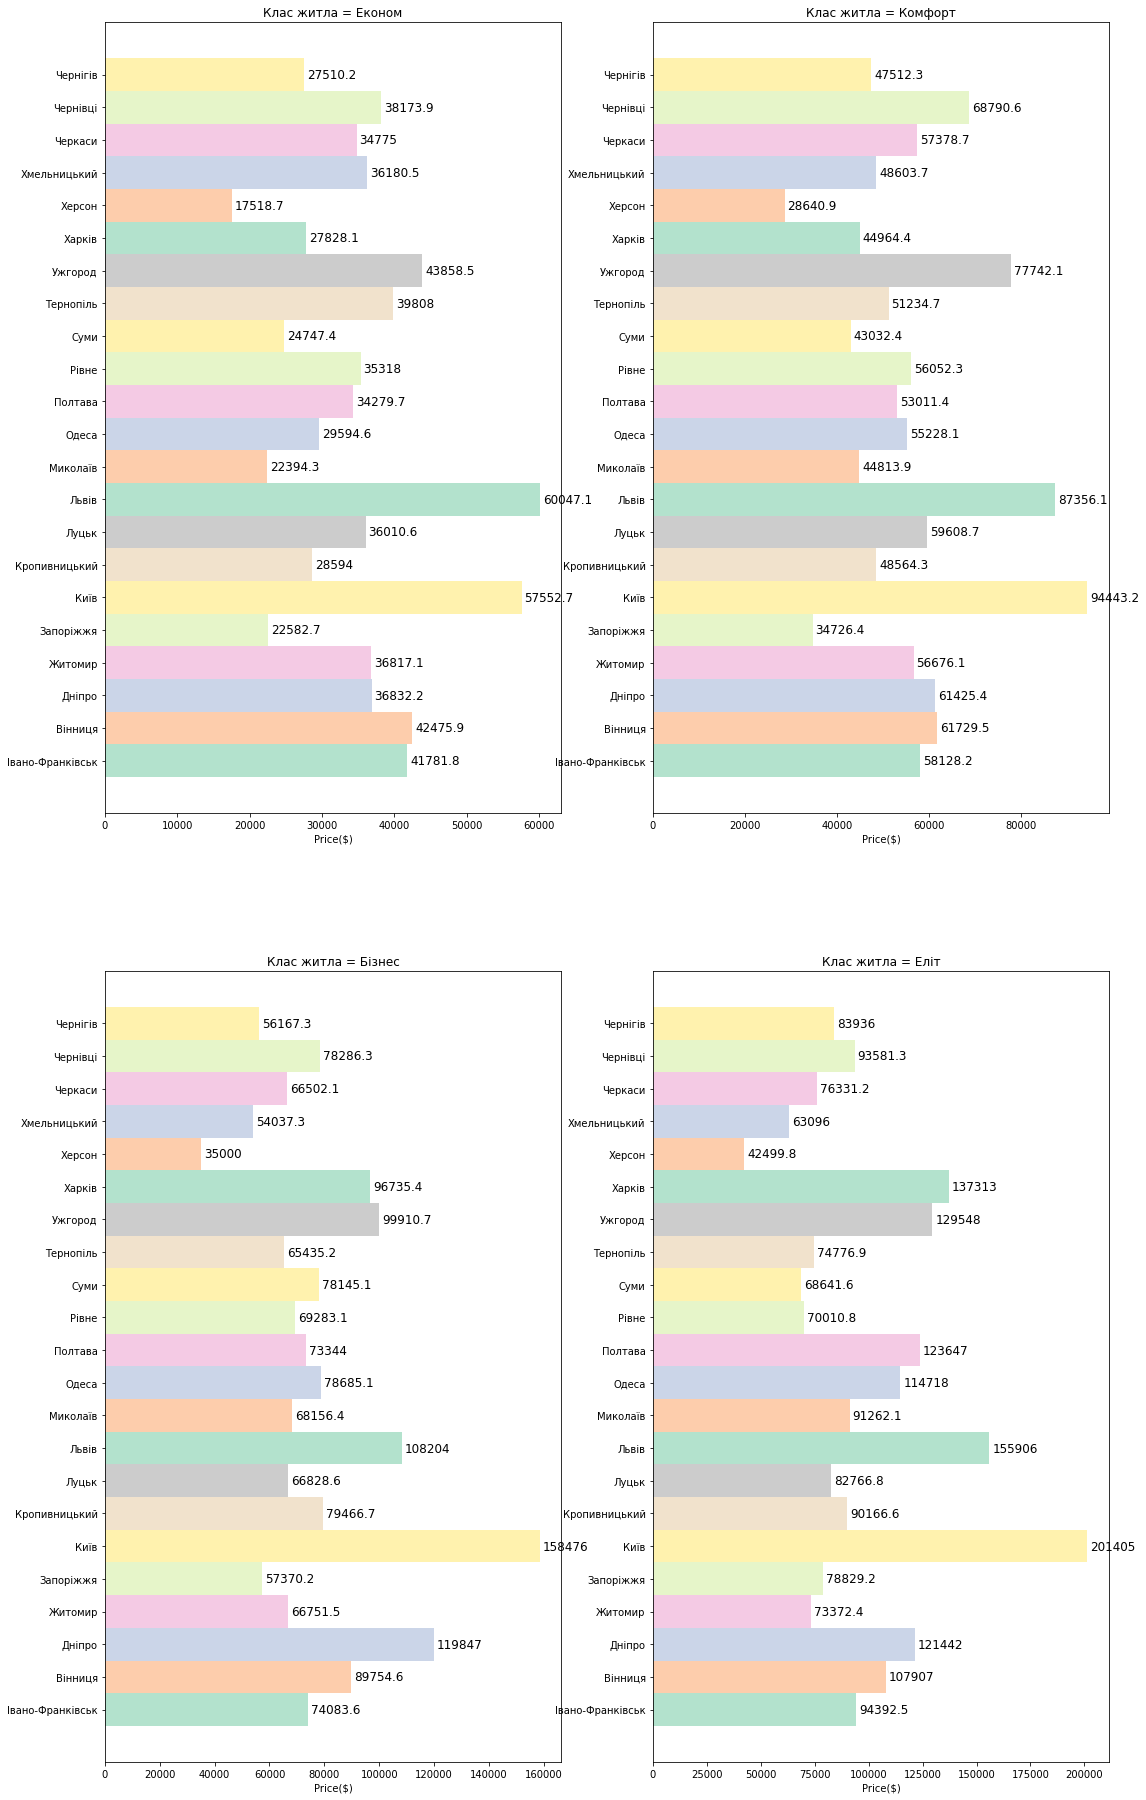

In [56]:
fig = plt.figure(figsize=(18, 32))

mosaic = '''
    12
    34
    '''
ax_dict = fig.subplot_mosaic(mosaic)

    
cities = grouped_klas.index.values
width = 1
y = np.arange(len(cities))
i = 0

for klas, ax_num in zip(grouped_klas.columns, ax_dict.keys()):    
    rects = ax_dict[ax_num].barh(y, grouped_klas[klas], 
                    width, color=get_colors('Pastel2', y))
    ax_dict[ax_num].bar_label(rects, padding=3, fontsize=12)
#     i += 1
    ax_dict[ax_num].set_xlabel('Price($)')
    ax_dict[ax_num].set_title(f'Клас житла = {dd[klas]}')
    ax_dict[ax_num].set_yticks(y - 1 + width, cities)
    ax_dict[ax_num].plot()

(10.0, 200.0, 5000.0, 250000.0)

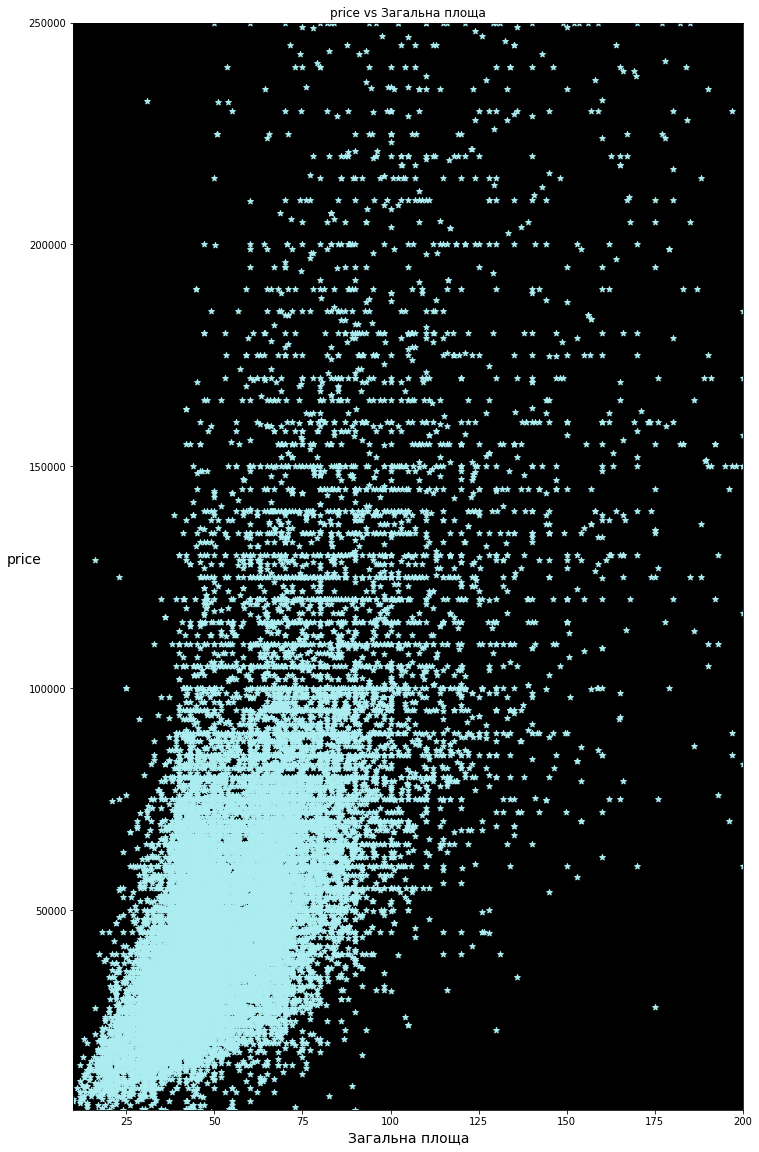

In [153]:
fig, ax = plt.subplots(figsize=(12,20))

ax.scatter(y=df['price'], x=df['Загальна площа'],edgecolor='#ABEDF1', facecolor='#ABEDF1', marker='*')
ax.set_facecolor('black')
# ax.set_yscale('log')
ax.set_ylabel('price', rotation=0, fontsize=14)

ax.set_xlabel('Загальна площа', fontsize=14)
# ax.set_xscale('log')
ax.set_title('price vs Загальна площа')
ax.axis([10,200, 5000, 250000])

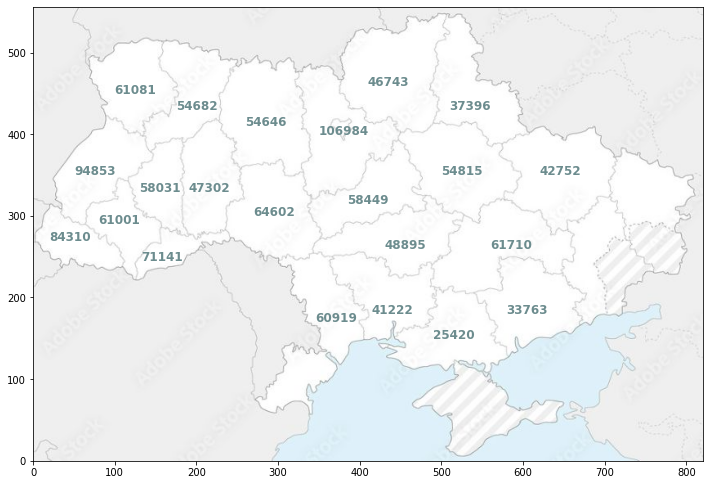

In [148]:
img = plt.imread('ukraine_regions.jpg')
fig, ax = plt.subplots(figsize=(12,20))

prices = big_cities.groupby(['city'])['price'].agg(group_func).astype(int)
coords = [[80,290], [270,300], [560,260], [260,410], [580,180], [350,400], [430,260],
         [100,450], [50,350], [415,180], [345,170], [500,350], [175,430], [510,430],
         [130,330], [20,270], [620,350], [490,150], [190,330], [385,315], [133,245], [410,460]]

for (x,y),s in zip(coords, prices):    
    plt.text(x, y, s, color='#6C8C8E', font={'size':12, 'weight':'bold'})
    
ax.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])